# In the entertainment industry there is a growing fad to sequelize popular media. This is known as the reboot. 

In [4]:
%matplotlib inline
import pandas as pd
import requests
import json
import time

from altair import *

import numpy as np
import matplotlib.pyplot as plt

In [5]:
r = requests.get("https://api.themoviedb.org/3/tv/top_rated?api_key=e05e00e33ef2f71556371cb5361fa9fe&language=en-US")

In [6]:
shows = json.loads(r.text)

In [7]:
totalPages = shows['total_pages']
totalPages

55

# What should we reboot next?

# https://priceonomics.com/ranking-the-most-beloved-tv-shows-that-got/

Firefly was the product of what happens when you smash the Sci-Fi and Western genres together as hard as you can and fill the cracks with Elmers glue. The TV show ran between September and December in 2002 and was followed up with a movie in 2005. To this day, Firefly is the highest rated, shortest running US prime time TV show of all time, making it prime for a reboot.

# Proving Firefly is the highest rated, shortest running US prime time TV show of all time.

In [8]:
firefly = json.loads(requests.get("https://api.themoviedb.org/3/tv/1437?api_key=e05e00e33ef2f71556371cb5361fa9fe&language=en-US").text)
firefly.keys()

dict_keys(['backdrop_path', 'created_by', 'episode_run_time', 'first_air_date', 'genres', 'homepage', 'id', 'in_production', 'languages', 'last_air_date', 'name', 'networks', 'number_of_episodes', 'number_of_seasons', 'origin_country', 'original_language', 'original_name', 'overview', 'popularity', 'poster_path', 'production_companies', 'seasons', 'status', 'type', 'vote_average', 'vote_count'])

In [9]:
firefly['id']

1437

In [10]:
popularbutcancelled = list()
api_key = 'e05e00e33ef2f71556371cb5361fa9fe'

for count in range(1,20):
    page = json.loads(requests.get("https://api.themoviedb.org/3/tv/top_rated?api_key=%s&language=en-US&page=%s"%(api_key, count)).text)  
   
    #now we need to call the api to get information for each show in the page...
    for result in range(len(page['results'])):
        resultID = page['results'][result]['id']
        show = json.loads(requests.get("https://api.themoviedb.org/3/tv/%s?api_key=%s&language=en-US"%(resultID, api_key)).text)

        if show['number_of_seasons'] == 1 and show['in_production'] == False and "US" in show['origin_country']:
            print(show['name'], show['id'], show['vote_average'], show['vote_count'])
            popularbutcancelled.append(show)      
    
    time.sleep(5) #because we need a break from calling the API many times!
    


Band of Brothers 4613 8.1 351
Firefly 1437 8.2 708
Cosmos: A Spacetime Odyssey 58474 8.1 203
Freaks and Geeks 2382 8.2 222
The Jinx: The Life and Deaths of Robert Durst 61929 8.1 58
Rubicon 30892 8.0 37
Terriers 33400 8.0 38
The Pacific 16997 7.9 91
Wonderfalls 1982 7.8 53
Police Squad! 6024 7.8 79
My So-Called Life 1101 7.8 46
Lonesome Dove 41692 7.8 46
Quarry 66911 7.7 66
Godless 73467 7.8 31
Journeyman 3184 7.6 37
The Tom and Jerry Show 7842 7.7 30
The Night Of 66276 7.7 202
The Lost Room 3868 7.7 31
Shōgun 13862 7.6 32
The Pillars of the Earth 33234 7.6 56
The Get Down 65345 7.6 49
11.22.63 64464 7.5 198
V 14141 7.5 60
The Twilight Zone 16399 7.5 33
Studio 60 on the Sunset Strip 1691 7.4 38
Forever 60726 7.4 157
Gilmore Girls: A Year in the Life 68799 7.4 40


In [11]:
rawData = {'title':[],'id':[],'vote_count':[], 'vote_average':[], 'popularity':[], 'number_of_episodes':[], 'number_of_seasons':[]}

In [12]:
for show in popularbutcancelled:
    rawData['title'].append(show['name'])
    rawData['id'].append(show['id'])
    rawData['vote_count'].append(show['vote_count'])
    rawData['vote_average'].append(show['vote_average']*10)
    rawData['popularity'].append(show['popularity'])
    rawData['number_of_episodes'].append(show['number_of_episodes'])
    rawData['number_of_seasons'].append(show['number_of_seasons'])

# More on how themoviedb computes the 'popularity' metric:
# https://developers.themoviedb.org/3/getting-started/popularity

In [37]:
popularButCancelledShows = pd.DataFrame(rawData).sort_values('popularity', ascending=False)
popularButCancelledShows

,id,number_of_episodes,number_of_seasons,popularity,title,vote_average,vote_count
1,1437,14,1,37.525029,Firefly,82.0,708
0,4613,10,1,33.743411,Band of Brothers,81.0,351
7,16997,13,1,15.291914,The Pacific,79.0,91
25,60726,22,1,14.812211,Forever,74.0,157
16,66276,8,1,12.056783,The Night Of,77.0,202
3,2382,18,1,11.565560,Freaks and Geeks,82.0,222
21,64464,8,1,9.849003,11.22.63,75.0,198
22,14141,2,1,9.764363,V,75.0,60
2,58474,13,1,9.675877,Cosmos: A Spacetime Odyssey,81.0,203
13,73467,7,1,9.234239,Godless,78.0,31


# More inspiration https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

# Visualizing the number of episodes for each TV series

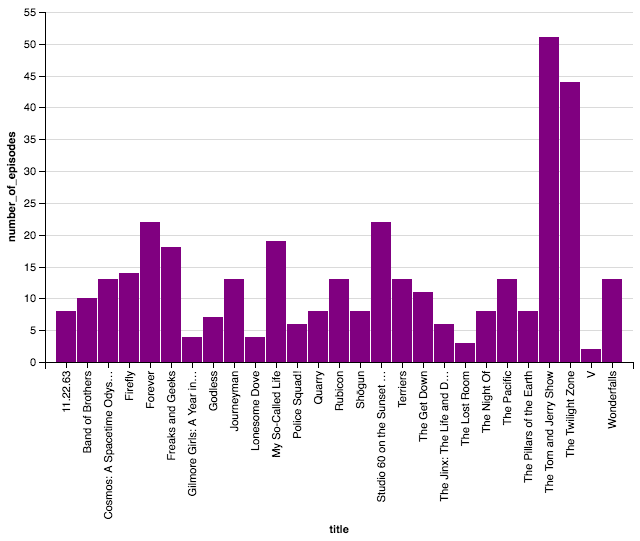

In [15]:
episodes = Chart(
    popularButCancelledShows[['title','number_of_episodes']],
    description = 'number of episodes').mark_bar(color = 'purple').encode(
    x='title:O',
    y='number_of_episodes:Q',
)
episodes

# Average vote superimposed over total vote

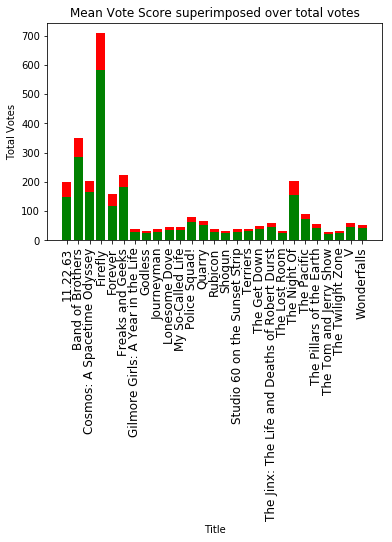

In [70]:
p1 = plt.bar(popularButCancelledShows['title'],
             popularButCancelledShows['vote_count']*(popularButCancelledShows['vote_average']/100),
             color='green')
p2 = plt.bar(popularButCancelledShows['title'], 
             popularButCancelledShows['vote_count']*(1-popularButCancelledShows['vote_average']/100),
             bottom = popularButCancelledShows['vote_count']*(popularButCancelledShows['vote_average']/100),
             color='red')

plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Total Votes')
plt.xlabel('Title')
plt.show()


# Visualizing the average rating of each TV series

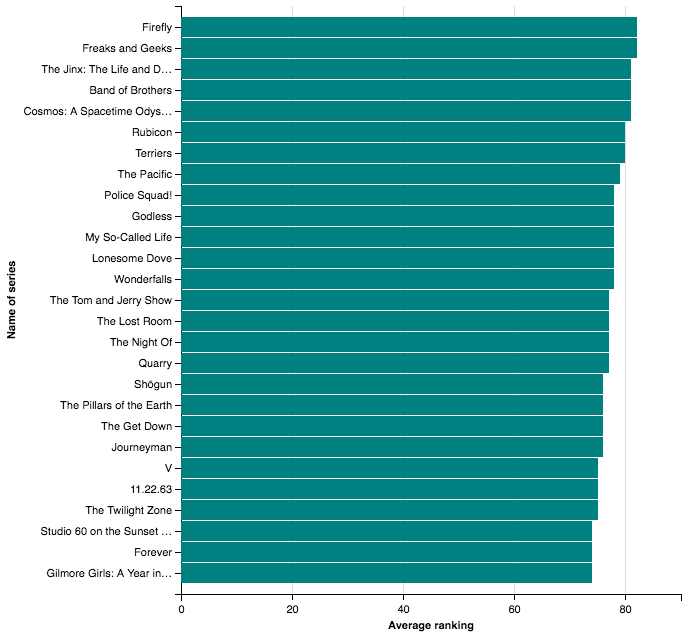

In [90]:
Chart(popularButCancelledShows).mark_bar(color = 'teal').encode(
    y=Y('title', axis = Axis(title = 'Name of series'), sort = SortField(field='vote_average', order= 'descending',op='sum')),
    x =X('vote_average', axis = Axis(title = 'Average ranking')),
)

# Testing for correlation between average ranking and number of votes

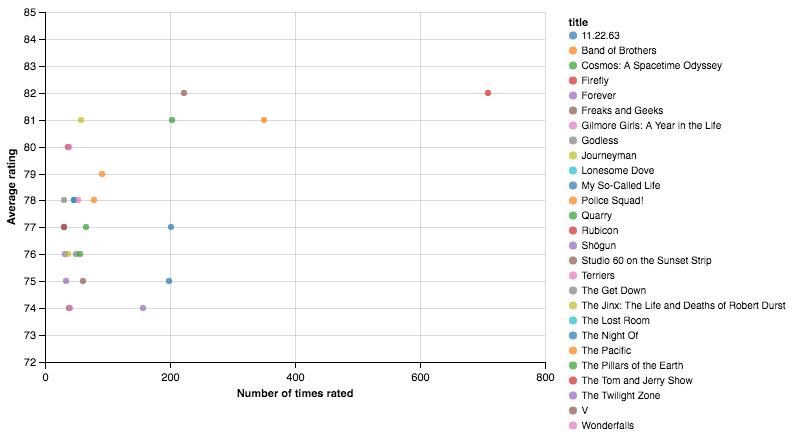

In [101]:
Chart(popularButCancelledShows).mark_point(filled=True).encode(
    y=Y('vote_average', axis = Axis(title = 'Average rating'),scale=Scale(domain=[72, 85])),
    x=X('vote_count', axis = Axis(title = 'Number of times rated')),
    color = Color('title')
)

# Visualizing the number of episodes vs the number of times rated

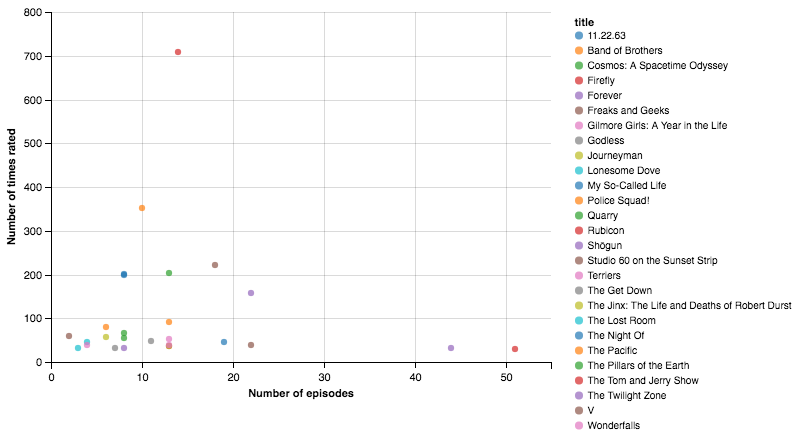

In [102]:
Chart(popularButCancelledShows).mark_point(filled=True).encode(
    y=Y('vote_count', axis = Axis(title = 'Number of times rated')),
    x=X('number_of_episodes', axis = Axis(title = 'Number of episodes')),
    color = 'title'
)

# conclusion: Firefly is not only the highest rated, shortest running show from American Television, it's the most popular as well!